# 📊 EDA on Cleaned Phishing Email Dataset

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
# ✅ Load cleaned dataset
clean_data_path = 'data/phishing_email_clean.csv'
if not os.path.exists(clean_data_path):
    raise FileNotFoundError(f"File not found: {clean_data_path}")
df = pd.read_csv(clean_data_path)
df['clean_text'] = df['clean_text'].fillna('')
df.head()

,text_combined,label,clean_text
0,hpl nom may 25 2001 see attached file hplno 52...,0,hpl nom may see attached file hplno xls hplno xls
1,nom actual vols 24 th forwarded sabrae zajac h...,0,nom actual vols forwarded sabrae zajac hou ect...
2,enron actuals march 30 april 1 201 estimated a...,0,enron actuals march april estimated actuals ma...
3,hpl nom may 30 2001 see attached file hplno 53...,0,hpl nom may see attached file hplno xls hplno xls
4,hpl nom june 1 2001 see attached file hplno 60...,0,hpl nom june see attached file hplno xls hplno...


In [36]:
# ✅ Class distribution
print("--- Class Distribution ---")
print(df['label'].value_counts())
print(df['label'].value_counts(normalize=True))

--- Class Distribution ---
label
1    42891
0    39595
Name: count, dtype: int64
label
1    0.519979
0    0.480021
Name: proportion, dtype: float64


In [37]:
# ✅ Text length statistics by class
df['text_length'] = df['clean_text'].apply(len)
df.groupby('label')['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,39595.0,1332.230989,3257.761558,3.0,338.0,660.0,1309.0,152790.0
1,42891.0,854.011075,17522.264131,0.0,199.0,350.0,955.0,3509414.0


In [38]:
# ✅ Top word frequency plot per class
def plot_top_words(label, n=20):
    words = ' '.join(df[df['label'] == label]['clean_text']).split()
    counter = Counter(words)
    top_words = counter.most_common(n)
    if not top_words:
        print(f"No words for label {label}")
        return
    words, counts = zip(*top_words)
    fig = px.bar(x=words, y=counts, labels={'x': 'Word', 'y': 'Frequency'},
                title=f"Top {n} Words in {'Phishing' if label == 1 else 'Legitimate'} Emails")
    fig.update_layout(xaxis_tickangle=-45)
    fig.write_html("sanity_plot.html")
    print("✅ Saved to sanity_plot.html")
    

plot_top_words(0)
plot_top_words(1)

✅ Saved to sanity_plot.html
✅ Saved to sanity_plot.html


In [39]:
# ✅ TF-IDF analysis per class
def tfidf_top_terms(label, top_n=20):
    texts = df[df['label'] == label]['clean_text']
    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    mean_tfidf = tfidf_matrix.mean(axis=0).A1
    terms = vectorizer.get_feature_names_out()
    top_indices = mean_tfidf.argsort()[::-1][:top_n]
    top_terms = [(terms[i], mean_tfidf[i]) for i in top_indices]
    print(f"Top TF-IDF Terms for {'Phishing' if label == 1 else 'Legitimate'} Emails:")
    for word, score in top_terms:
        print(f"{word}: {score:.4f}")

tfidf_top_terms(0)
tfidf_top_terms(1)

Top TF-IDF Terms for Legitimate Emails:
enron: 0.0290
ect: 0.0255
aug: 0.0190
list: 0.0178
wrote: 0.0177
new: 0.0154
email: 0.0149
thanks: 0.0145
like: 0.0142
message: 0.0142
know: 0.0137
subject: 0.0135
python: 0.0134
use: 0.0133
hou: 0.0127
file: 0.0127
time: 0.0125
com: 0.0125
wed: 0.0124
vince: 0.0122
Top TF-IDF Terms for Phishing Emails:
aug: 0.0482
wed: 0.0282
replica: 0.0261
thu: 0.0240
email: 0.0208
cnncom: 0.0204
watches: 0.0195
news: 0.0187
cnn: 0.0178
daily: 0.0173
alert: 0.0165
click: 0.0165
money: 0.0153
fri: 0.0153
account: 0.0153
com: 0.0150
time: 0.0148
life: 0.0140
new: 0.0137
http: 0.0137


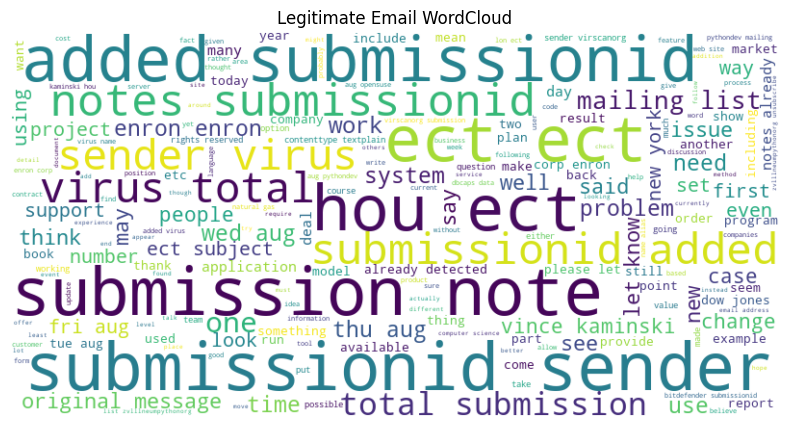

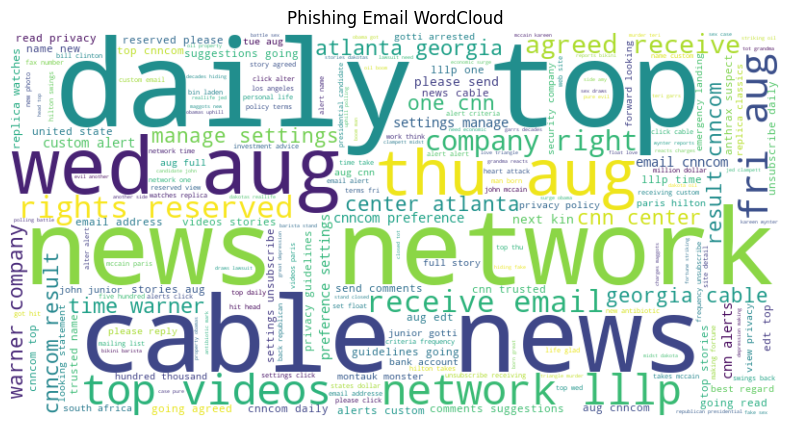

In [40]:
# ✅ WordCloud generation per class
def generate_wordcloud(label):
    text = ' '.join(df[df['label'] == label]['clean_text'])
    if not text.strip():
        print(f"No content to generate wordcloud for label {label}")
        return
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{'Phishing' if label == 1 else 'Legitimate'} Email WordCloud")
    plt.show()

generate_wordcloud(0)
generate_wordcloud(1)